In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('data/predictive_maintenance.csv')
df.head()

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,No Failure
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,No Failure
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,No Failure
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,No Failure
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,No Failure


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   UDI                      10000 non-null  int64  
 1   Product ID               10000 non-null  object 
 2   Type                     10000 non-null  object 
 3   Air temperature [K]      10000 non-null  float64
 4   Process temperature [K]  10000 non-null  float64
 5   Rotational speed [rpm]   10000 non-null  int64  
 6   Torque [Nm]              10000 non-null  float64
 7   Tool wear [min]          10000 non-null  int64  
 8   Target                   10000 non-null  int64  
 9   Failure Type             10000 non-null  object 
dtypes: float64(3), int64(4), object(3)
memory usage: 781.4+ KB


In [29]:
df.describe()

,UDI,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,300.004930,310.005560,1538.776100,39.986910,107.951000,0.033900
std,2886.89568,2.000259,1.483734,179.284096,9.968934,63.654147,0.180981
min,1.00000,295.300000,305.700000,1168.000000,3.800000,0.000000,0.000000
25%,2500.75000,298.300000,308.800000,1423.000000,33.200000,53.000000,0.000000
50%,5000.50000,300.100000,310.100000,1503.000000,40.100000,108.000000,0.000000
75%,7500.25000,301.500000,311.100000,1612.000000,46.800000,162.000000,0.000000
max,10000.00000,304.500000,313.800000,2886.000000,76.600000,253.000000,1.000000


In [45]:
df.columns

Index(['UDI', 'Product ID', 'Type', 'Air temperature [K]',
       'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]',
       'Tool wear [min]', 'Target', 'Failure Type'],
      dtype='object')

In [15]:
num_col = []
for col in df.columns[2:len(df.columns)-1]:
    if df[col].dtype == 'float' or df[col].dtype == 'int':
        num_col.append(col)
num_col

['UDI',
 'Air temperature [K]',
 'Process temperature [K]',
 'Rotational speed [rpm]',
 'Torque [Nm]',
 'Tool wear [min]',
 'Target']

In [54]:
for col in num_col:
    print(f'{col}: \n {df.groupby('Target')[col].agg(['mean','var'])}')

Air temperature [K]: 
               mean       var
Target                      
0       299.973999  3.963077
1       300.886431  4.290999
Process temperature [K]: 
               mean       var
Target                      
0       309.995570  2.210711
1       310.290265  1.859639
Rotational speed [rpm]: 
                mean            var
Target                            
0       1540.260014   28020.996982
1       1496.486726  148181.534587
Torque [Nm]: 
              mean         var
Target                       
0       39.629655   89.720302
1       50.168142  268.124189
Tool wear [min]: 
               mean          var
Target                         
0       106.693717  3962.172537
1       143.781711  5293.999546
Target: 
         mean  var
Target           
0        0.0  0.0
1        1.0  0.0


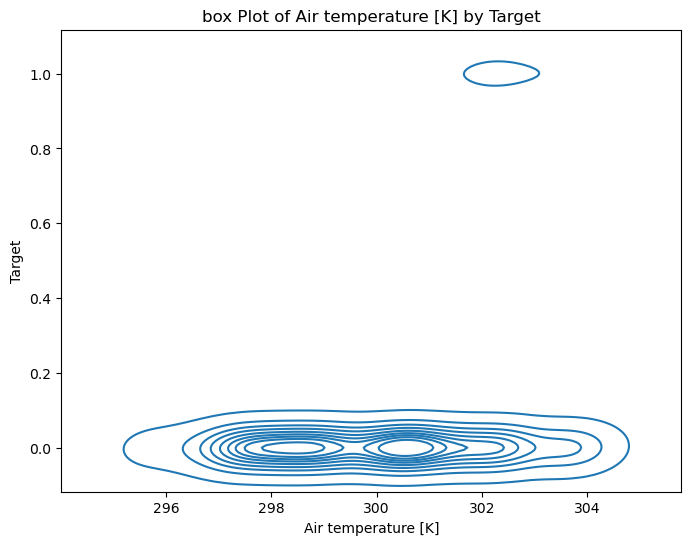

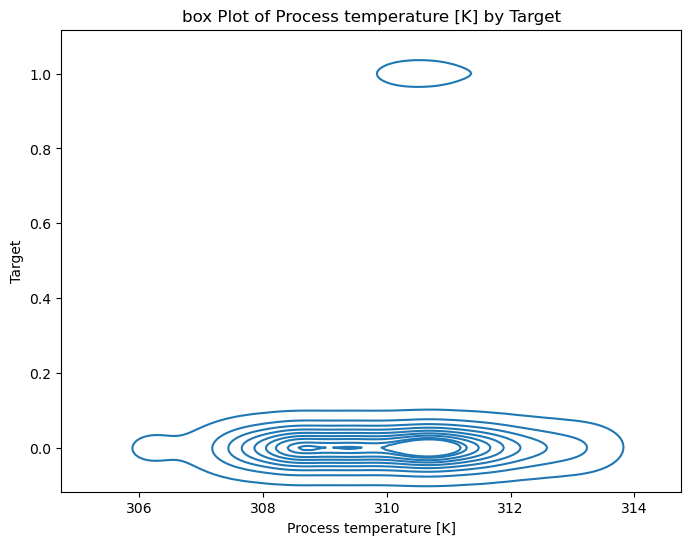

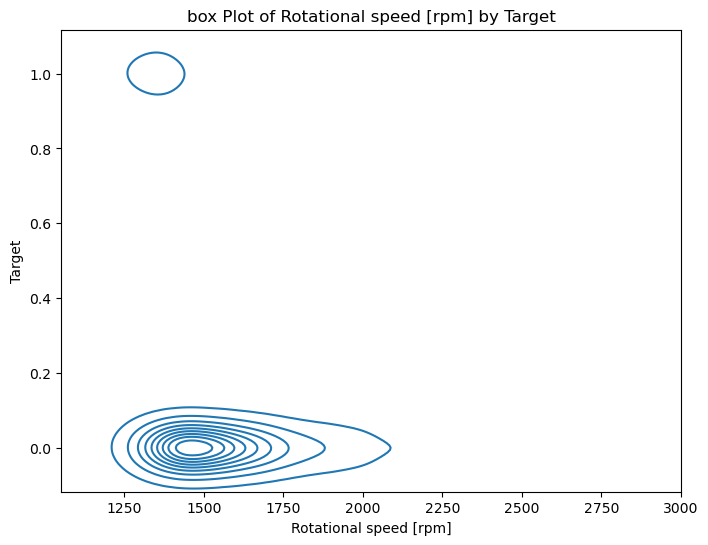

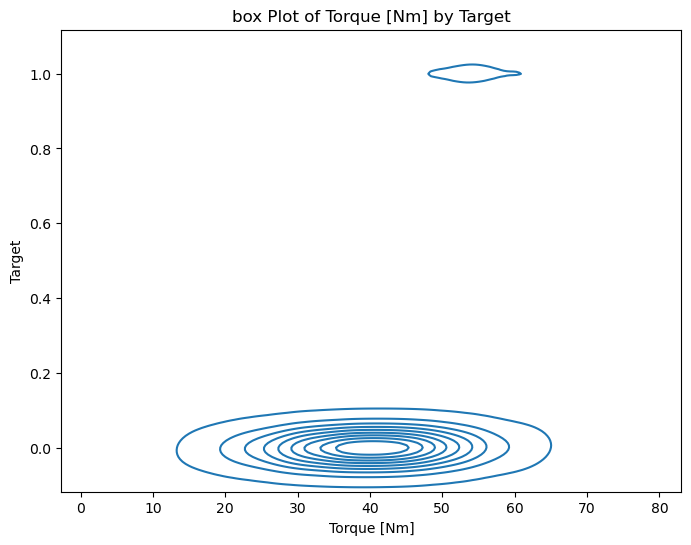

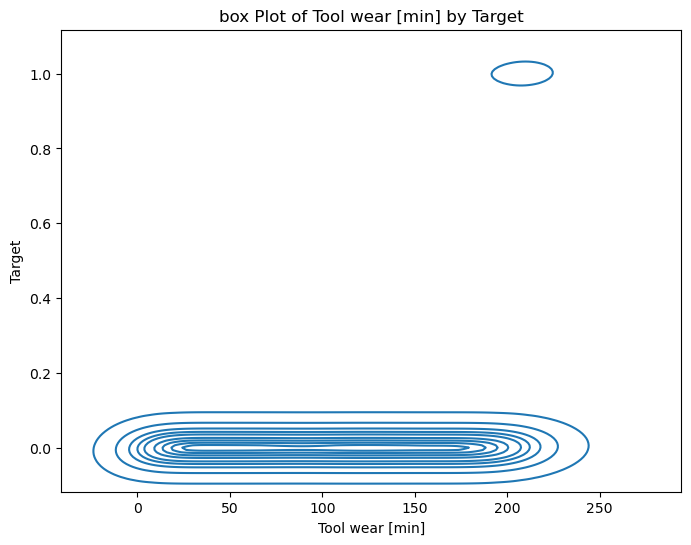

In [59]:

for col in num_col[:5]:  # Slice to use only the first 6 columns
    plt.figure(figsize=(8, 6))  # Optional: Adjust figure size for better clarity
    sns.kdeplot(data=df, y='Target', x=col)
    plt.title(f"box Plot of {col} by Target")  # Add title to each plot
    plt.show()


In [62]:
train_x = df[df.columns[3:-2]]

In [119]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaled_df= scaler.fit_transform(df[df.columns[3:-2]])

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import train_test_split
from xgboost
from sklearn.metrics import roc_curve,f1_score
train_x,test_x, train_y,test_y = train_test_split(scaled_df,df['Target'],random_state=42)
model = ExtraTreesClassifier()
model.fit(train_x,train_y)
pred_y = model.predict(test_x)
fpr, tpr, thresholds = roc_curve(test_y, pred_y)

print(f'f1_score : {f1_score(pred_y,test_y)}')
print(fpr, tpr, thresholds)

f1_score : 0.6666666666666666
[0.         0.00164745 1.        ] [0.         0.52777778 1.        ] [inf  1.  0.]


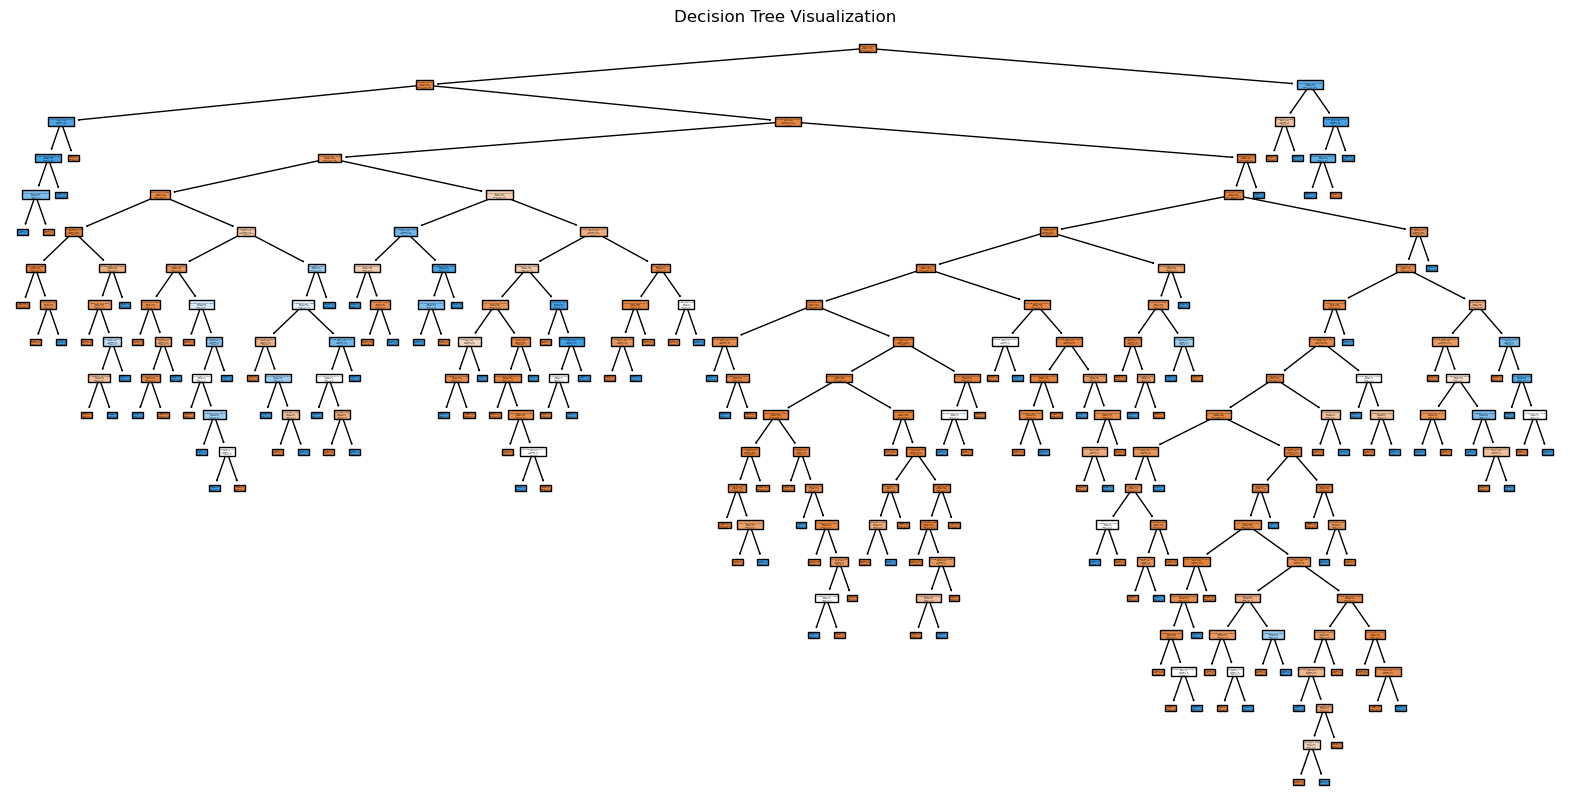

In [105]:
# 클래스 이름을 문자열 리스트로 변환
from sklearn.tree import plot_tree
class_names = [str(label) for label in df['Target'].unique()]  # 중복 제거, 문자열 변환

# 피처 이름
feature_names = df.columns[3:-2]

# 트리 시각화
plt.figure(figsize=(20, 10))  # 플롯 크기 설정
plot_tree(model, 
          feature_names=feature_names, 
          class_names=class_names, 
          filled=True)  # filled=True는 노드를 색상으로 채움
plt.title("Decision Tree Visualization")
plt.show()